In [48]:
import numpy as np
import pandas as pd # repeating - we did this earlier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [2]:
import pandas as pd

## Load Data

In [50]:
housing_df = pd.read_csv('WestRoxbury.csv')

In [4]:
housing_df.shape

(5802, 14)

In [5]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [6]:
print(housing_df)

      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0            344.2  4330       9965      1880         2436         1352   
1            412.6  5190       6590      1945         3108         1976   
2            330.1  4152       7500      1890         2294         1371   
3            498.6  6272      13773      1957         5032         2608   
4            331.5  4170       5000      1910         2370         1438   
...            ...   ...        ...       ...          ...          ...   
5797         404.8  5092       6762      1938         2594         1714   
5798         407.9  5131       9408      1950         2414         1333   
5799         406.5  5113       7198      1987         2480         1674   
5800         308.7  3883       6890      1946         2000         1000   
5801         447.6  5630       7406      1950         2510         1600   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
0         2.0      6  

# data loading and preprocessing

In [51]:
housing_df.columns = [s.strip().replace(' ', '_') 
   for s in housing_df.columns]

In [8]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [9]:
housing_df = pd.get_dummies(housing_df, 
   prefix_sep='_', drop_first=True)

In [10]:
housing_df.head()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,0,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,0,1
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,0,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,0,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,0,0


# create list of predictors and outcome

In [12]:
excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
print(predictors)

['LOT_SQFT', 'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent']


In [13]:
outcome = 'TOTAL_VALUE'

# Different ways of showing the first 10 values in column TOTAL_VALUE

In [14]:
housing_df['TOTAL_VALUE'].iloc[0:10] 

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [15]:
housing_df.iloc[0:10]['TOTAL_VALUE']

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [16]:
housing_df.iloc[0:10].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

# Show the fifth row of the first 10 columns

In [17]:
housing_df.iloc[4][0:10]

TOTAL_VALUE     331.5
TAX            4170.0
LOT_SQFT       5000.0
YR_BUILT       1910.0
GROSS_AREA     2370.0
LIVING_AREA    1438.0
FLOORS            2.0
ROOMS             7.0
BEDROOMS          3.0
FULL_BATH         2.0
Name: 4, dtype: float64

In [18]:
housing_df.iloc[4, 0:10]

TOTAL_VALUE     331.5
TAX            4170.0
LOT_SQFT       5000.0
YR_BUILT       1910.0
GROSS_AREA     2370.0
LIVING_AREA    1438.0
FLOORS            2.0
ROOMS             7.0
BEDROOMS          3.0
FULL_BATH         2.0
Name: 4, dtype: float64

In [19]:
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


# Use pd.concat to combine non-consecutive 
# columns into a new data frame. Axis 
# argument specifies dimension along which 
# concatenation happens, 0=rows, 1=columns.

In [20]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


# To specify a full column, use:

In [22]:
housing_df.iloc[:,0:1]

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
...,...
5797,404.8
5798,407.9
5799,406.5
5800,308.7


In [23]:
housing_df.TOTAL_VALUE

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

In [24]:
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

# Descriptive statistics

In [25]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))

Number of rows  5802


In [26]:
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

Mean of TOTAL_VALUE  392.6857149258885


In [27]:
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000,5802.000000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917,0.100138,0.150810
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108,0.300210,0.357894
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000,0.000000,0.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000,1.000000,1.000000


# To illustrate missing data procedures, we first convert a few entries for  bedrooms to NA's. Then we impute these missing values using the median of the remaining values.

In [32]:
housing_df.sample(10)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
804,478.6,6020,6006,2000,3129,2021,2.0,7,4,2,1,1,1,0,0
5209,360.3,4532,4500,1925,2680,1200,1.0,6,3,1,1,1,1,0,0
1158,291.1,3662,4160,1950,2720,1498,1.5,6,2,1,1,1,1,0,0
5263,386.0,4855,3475,1940,2570,1582,2.0,7,3,1,1,1,0,0,0
3431,462.4,5816,6925,1960,2421,1578,2.0,7,4,1,1,1,1,0,1
4752,557.7,7015,8040,1945,3248,1602,1.0,9,3,1,1,1,1,0,0
301,204.9,2577,4200,1920,2296,990,1.0,5,3,1,0,1,1,0,0
4637,481.0,6050,7373,1951,3220,1761,1.5,6,4,2,0,1,1,0,0
4371,413.4,5200,5218,1930,2948,1591,1.5,5,4,2,0,1,1,0,0
3485,304.8,3834,5025,1960,2464,1075,1.0,6,3,1,1,1,1,0,0


In [33]:
missingRows = housing_df.sample(10).index
print(missingRows)

Int64Index([1091, 1580, 3917, 3504, 5338, 3771, 4767, 2961, 1405, 3622], dtype='int64')


In [34]:
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan

In [53]:
housing_df.loc[missingRows, 'BEDROOMS']

1091    2
1580    2
3917    3
3504    3
5338    4
3771    4
4767    3
2961    3
1405    3
3622    3
Name: BEDROOMS, dtype: int64

In [38]:
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
  housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after setting to NAN:  5792


In [39]:
# remove rows with missing values 

In [40]:
reduced_df = housing_df.dropna()

In [41]:
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


# set random_state for reproducibility

## training (60%) and validation (40%)

In [42]:
trainData, validData = train_test_split(housing_df, 
   test_size=0.40, random_state=1)

## training (50%), validation (30%), and test (20%)


In [43]:
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)

In [44]:
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)

In [54]:
excludeColumns = ('TOTAL_VALUE', 'TAX','REMODEL')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)



In [55]:
model = LinearRegression()
model.fit(train_X, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
excludeColumns = ('TOTAL_VALUE', 'TAX','REMODEL')

In [57]:
predictors = [s for s in housing_df.columns if s not in excludeColumns]
print(predictors)

['LOT_SQFT', 'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE']


In [58]:
outcome = 'TOTAL_VALUE'

In [63]:
X = housing_df[predictors]
X.head()

,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
0,9965,1880,2436,1352,2.0,6,3,1,1,1,0
1,6590,1945,3108,1976,2.0,10,4,2,1,1,0
2,7500,1890,2294,1371,2.0,8,4,1,1,1,0
3,13773,1957,5032,2608,1.0,9,5,1,1,1,1
4,5000,1910,2370,1438,2.0,7,3,2,0,1,0


In [64]:
y = housing_df[outcome]
y.head()

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
Name: TOTAL_VALUE, dtype: float64

In [65]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [71]:
valid_y.head()

1822    462.0
1998    370.4
5126    407.4
808     316.1
4034    393.2
Name: TOTAL_VALUE, dtype: float64

In [72]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
train_pred = model.predict(train_X)
train_pred

array([390.85037935, 411.40132242, 387.55722203, ..., 413.0327121 ,
       328.97889373, 352.97425427])

In [75]:
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
2024        392.0  390.850379   1.149621
5140        476.3  411.401322  64.898678
5259        367.4  387.557222 -20.157222
421         350.3  376.476687 -26.176687
1401        348.1  311.264043  36.835957


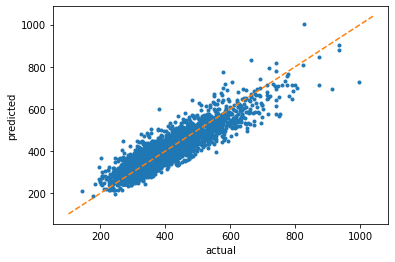

In [76]:
%matplotlib inline
import matplotlib.pylab as plt

plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [77]:
from sklearn.metrics import r2_score

print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))

Training set r2:  0.80323188093828
